In [1]:
# import warnings
# warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from scipy import stats
from scipy.stats import norm
plt.rcParams.update({'font.size': 10, 'figure.figsize': (6, 6)})


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/MLlingo/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv('data/house_price/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#df.info()

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


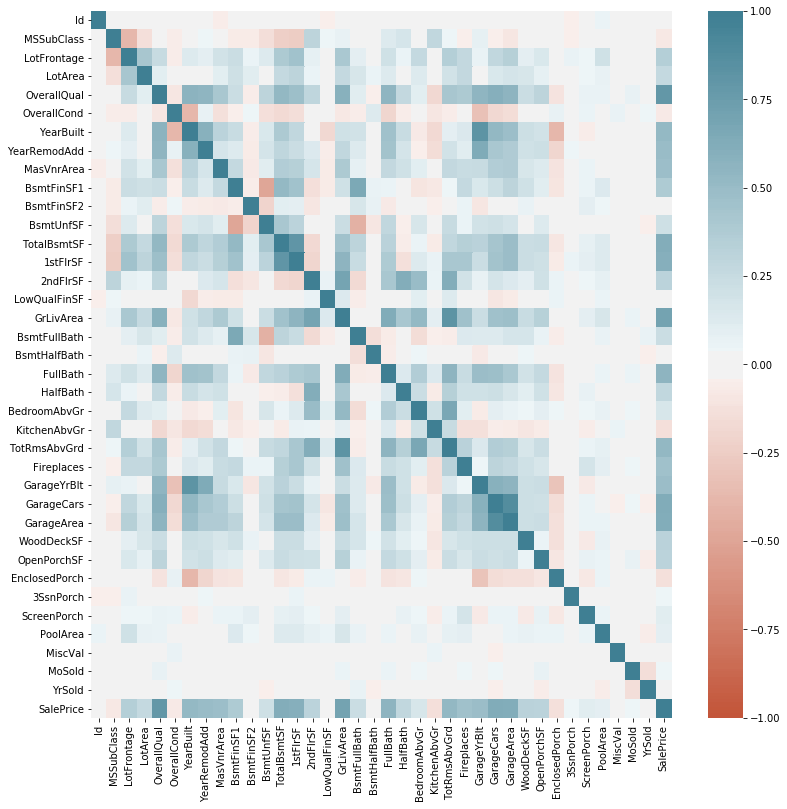

In [27]:
f, ax = plt.subplots(figsize=(13,13))
ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200))

In [3]:
corr_threshold = 0.3  # Only take feature with higher correlation
cat_columns = df.select_dtypes(include=['O']).columns
corr_with_price = abs(df.corrwith(df['SalePrice']))
keep_num_column = list(corr_with_price[corr_with_price > corr_threshold].index)
keep_num_column.remove('SalePrice')
keep_cat_column = ['CentralAir', 'KitchenQual', 'LotShape']
print(keep_num_column)

['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']


In [4]:
# Feature Engineering
df.loc[ (df['LotShape'] != 'Reg'), 'LotShape'] = 'NonReg'
df.loc[(df['KitchenQual'] != 'Ex'), 'KitchenQual'] = 'NonEx'
# df.loc[(df['BsmtQual'] != 'Ex'), 'BsmtQual'] = 'NonEx'
# df.loc[(df['ExterQual'] != 'Ex'), 'ExterQual'] = 'NonEx'

In [30]:
print(df['BsmtFinSF1'].corr(df['TotalBsmtSF']))
print(df['1stFlrSF'].corr(df['2ndFlrSF']))
print(df['GarageYrBlt'].corr(df['GarageCars']))

0.5223960519923857
-0.20264618100232085
0.5889200070047003


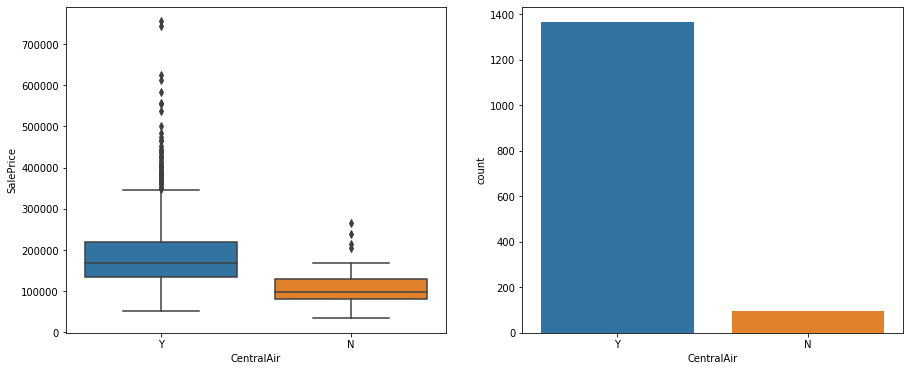

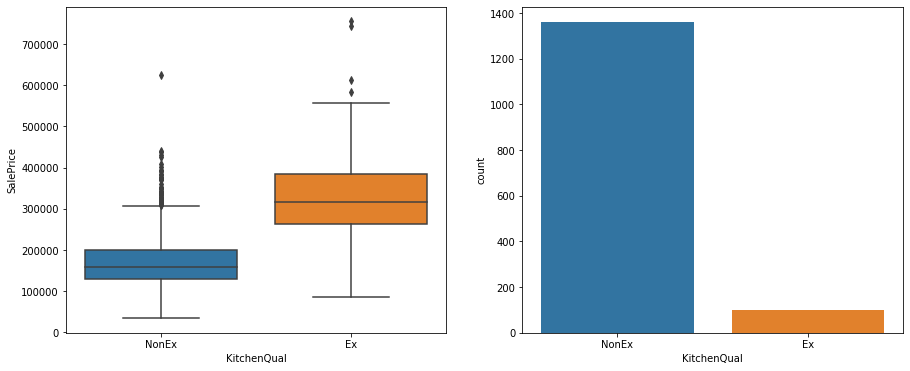

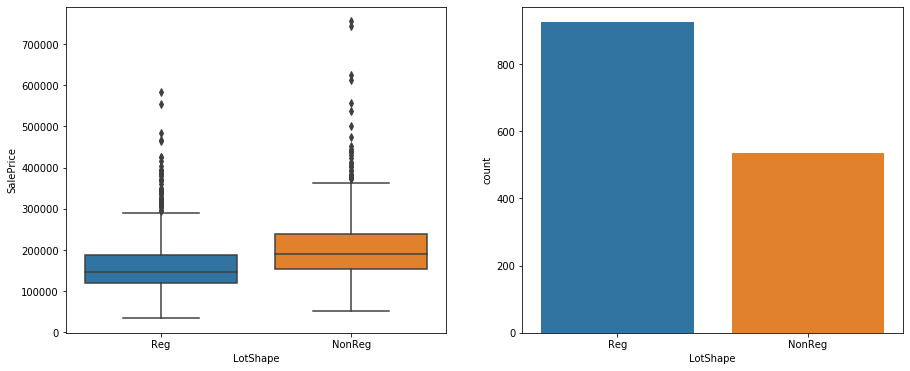

In [10]:
for column in keep_cat_column:
    f , (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    sns.boxplot(x=column, y='SalePrice', data=df, ax = ax1)
    sns.countplot(x = column, data=df, ax = ax2)

### Analysis of dependent variable

In [8]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

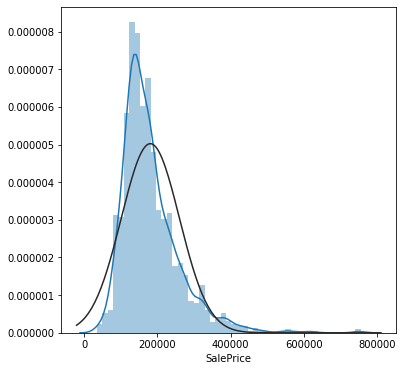

In [9]:
sns.distplot(df['SalePrice'], fit=norm)

In [10]:
print("Skewnes: ", df['SalePrice'].skew())
print("Kurtosis: ", df['SalePrice'].kurt())

Skewnes:  1.8828757597682129
Kurtosis:  6.536281860064529


((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

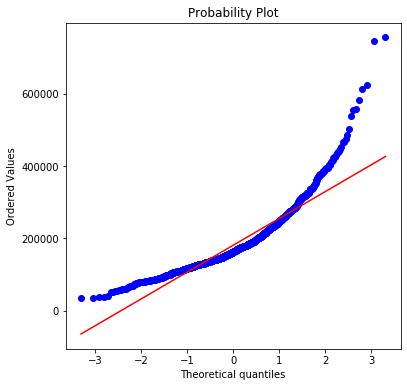

In [11]:
stats.probplot(df['SalePrice'], plot=plt)

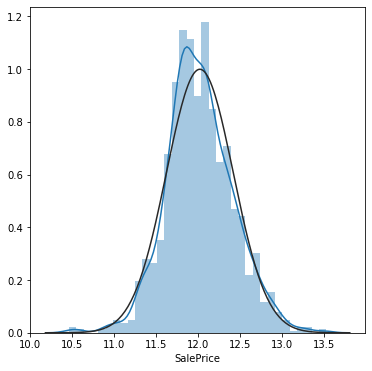

In [5]:
# Convert prices to log
df['SalePrice'] = np.log(df['SalePrice'])
sns.distplot(df['SalePrice'], fit=norm)

### Outliers

In [26]:
# Univariate Analysis
# # REMOVING OUTLIER USING BOX PLOT / Z-Score 
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 


IQR_mult = 2
_filter = (df['SalePrice'] >= Q1 - IQR_mult * IQR) & (df['SalePrice'] <= Q3 + IQR_mult *IQR)
print("No of utliers using z-score: ", df['SalePrice'].count() - _filter.sum())

## Removing using Z-score 
# from scipy import stats
# (np.abs(stats.zscore(df['SalePrice'])) < 3).sum()

No of utliers using z-score:  38


#### Bivariate Analysis

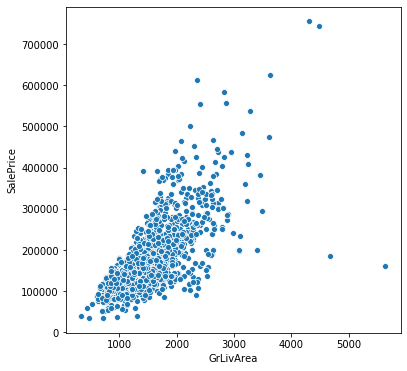

In [29]:
sns.scatterplot('GrLivArea', 'SalePrice', data=df)

In [30]:
df.sort_values(by = 'GrLivArea', ascending = False)[:2] # ABOVE 2 Outlier points

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


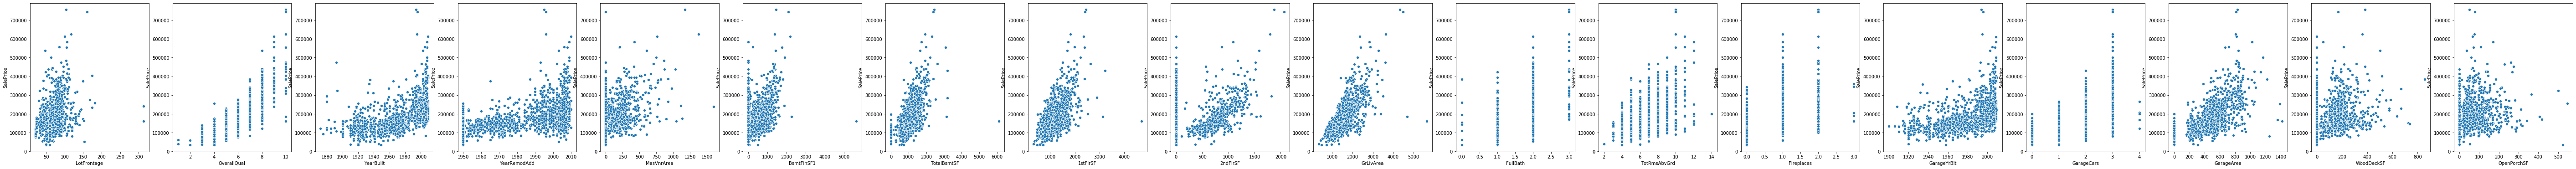

In [31]:
fig, ax = plt.subplots(nrows = 1, ncols = len(keep_num_column), figsize=(100, 6))
for i, col in enumerate(keep_num_column):
    sns.scatterplot(col, 'SalePrice', data=df, ax = ax[i])

In [32]:
df.sort_values(by = '1stFlrSF', ascending = False)[:1] # ABOVE 1 Outlier points

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [38]:
df.sort_values(by = 'TotalBsmtSF', ascending = False)[:1]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [42]:
df.sort_values(by = 'LotFrontage', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000


In [44]:
df.sort_values(by = 'BsmtFinSF1', ascending = False)[:1]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [46]:
df.sort_values(by = 'GarageArea', ascending = False)[:4]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000


In [47]:
df.sort_values(by = 'OpenPorchSF', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1328,1329,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,1150,6,2008,WD,Normal,256000
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900


In [6]:
outlier_indices = [1298, 523, 934, 495]
df.drop(outlier_indices, inplace=True)

In [11]:
# remove all rows that have outliers in at least one column
# from scipy import stats
# df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

### SKlearn

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, \
LabelEncoder, LabelBinarizer, StandardScaler, RobustScaler

from sklearn.linear_model import LassoCV, SGDRegressor, RidgeCV, ElasticNetCV, Lasso, Ridge, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor, IsolationForest
from xgboost import XGBRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics.pairwise import rbf_kernel

In [8]:
cat_transformer = Pipeline(
    steps=[('cat_imputer', SimpleImputer(strategy='most_frequent')), ('encoder', OneHotEncoder(drop='first'))]
)
num_transofrmer = Pipeline(
    steps=[('imputer' , SimpleImputer(strategy='mean')), ('scaler', MinMaxScaler())]
)
col_transformer = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, keep_cat_column),
        ('num', num_transofrmer, keep_num_column),
    ]
)
X = col_transformer.fit_transform(df.drop(['SalePrice'], axis=1))
features_list = keep_num_column + keep_cat_column
y = df['SalePrice']

In [17]:
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.25, random_state=42)

####  Lasso, Ridge, and Elasticnet with Parameter Tuning

best alpha: 0.00015504644215349784


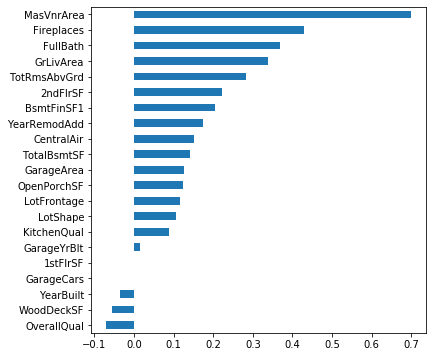

In [9]:
# LassoCV
clf_lasso = LassoCV().fit(X, y)
coef = pd.Series(clf_lasso.coef_, index = features_list).sort_values()
print("best alpha: " + str(clf_lasso.alpha_))
coef.plot(kind='barh')

In [11]:
print("root_mean_squared_error: ", -np.mean(cross_val_score(Lasso(alpha=clf_lasso.alpha_), X, y, scoring='neg_root_mean_squared_error')))

root_mean_squared_error:  0.1338803790875031


alpha: 0.5


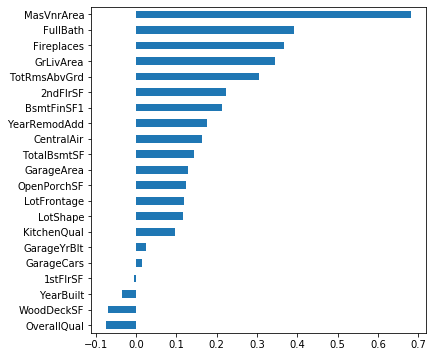

In [12]:
clf_ridge = RidgeCV(alphas=(0.1 , 0.5, 1.0, 5.0, 6.0)).fit(X, y)
coef = pd.Series(clf_ridge.coef_, index = features_list).sort_values()
print("alpha: " + str(clf_ridge.alpha_))
coef.plot(kind='barh')

In [16]:
print("neg_root_mean_squared_error: ", np.mean(cross_val_score(Ridge(alpha=clf_ridge.alpha_), X, y, scoring='neg_root_mean_squared_error')))

neg_root_mean_squared_error:  -0.1340224154146599


alpha: 0.000289193661749375


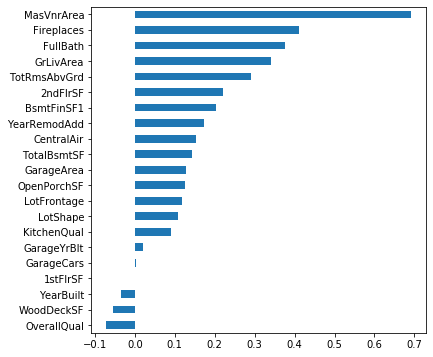

In [14]:
clf_els = ElasticNetCV().fit(X, y)
coef = pd.Series(clf_els.coef_, index = features_list).sort_values()
print("alpha: " + str(clf_els.alpha_))
coef.plot(kind='barh')

In [15]:
print("neg_root_mean_squared_error: ", np.mean(cross_val_score(ElasticNet(alpha=clf_els.alpha_, l1_ratio=0.9), X, y, scoring='neg_root_mean_squared_error')))

neg_root_mean_squared_error:  -0.13392469686304828


#### SGD Regressor

In [18]:
# Mean Square Error
sgd_reg = make_pipeline(RobustScaler(), SGDRegressor())
print("neg_root_mean_squared_error: ", np.mean(cross_val_score(sgd_reg, X, y, scoring='neg_root_mean_squared_error')))

#print("R2: ", np.mean(cross_val_score(sgd_reg, X, y, scoring='r2')))

neg_root_mean_squared_error:  -0.21960793820000077


#### Kernel Ridge

In [43]:
kernel_ridge = make_pipeline(RobustScaler(), KernelRidge(kernel='polynomial', alpha=0.5, degree=2))
print("neg_root_mean_squared_error: ", np.mean(cross_val_score(kernel_ridge, X, y, scoring='neg_root_mean_squared_error')))

neg_root_mean_squared_error:  -0.13384760781567612


#### Gradient Boost Regressor

In [31]:
grb = make_pipeline(RobustScaler(), GradientBoostingRegressor(n_estimators = 500, max_depth=1))
print("neg_root_mean_squared_error: ", np.mean(cross_val_score(grb, X, y, scoring='neg_root_mean_squared_error')))

neg_root_mean_squared_error:  -0.1348889715725781


#### XGB regressor

In [36]:
xgb = make_pipeline(RobustScaler(), XGBRegressor( n_estimators=500,
                             learning_rate=0.05, max_depth=3))
print("neg_root_mean_squared_error: ", np.mean(cross_val_score(xgb, X, y, scoring='neg_root_mean_squared_error')))

neg_root_mean_squared_error:  -0.1340031126020447


#### Detect and Remove Outlier unsupervised learning algorithms

In [51]:
lof = LocalOutlierFactor()
outl = lof.fit_predict(X)
X_rem = X[outl == 1]
y_rem = y[outl == 1]

kernel_ridge_lof = make_pipeline(RobustScaler(), KernelRidge(kernel='polynomial', alpha=0.5, degree=2))
print("kernel neg_root_mean_squared_error: ", np.mean(cross_val_score(kernel_ridge_lof, X_rem, y_rem, scoring='neg_root_mean_squared_error')))

xgb_lof = make_pipeline(RobustScaler(), XGBRegressor( n_estimators=500,
                             learning_rate=0.05, max_depth=3))
print("xgb neg_root_mean_squared_error: ", np.mean(cross_val_score(xgb_lof, X_rem, y_rem, scoring='neg_root_mean_squared_error')))

kernel neg_root_mean_squared_error:  -0.13241741067925947
xgb neg_root_mean_squared_error:  -0.13284268140489347


In [57]:
isf = IsolationForest()
outl = isf.fit_predict(X)
X_rem = X[outl == 1]
y_rem = y[outl == 1]
print(X_rem.shape, y_rem.shape)
kernel_ridge_isf = make_pipeline(RobustScaler(), KernelRidge(kernel='polynomial', alpha=0.5, degree=2))
print("kernel neg_root_mean_squared_error: ", np.mean(cross_val_score(kernel_ridge_isf, X_rem, y_rem, scoring='neg_root_mean_squared_error')))

xgb_isf = make_pipeline(RobustScaler(), XGBRegressor( n_estimators=500,
                             learning_rate=0.05, max_depth=3))
print("xgb neg_root_mean_squared_error: ", np.mean(cross_val_score(xgb_isf, X_rem, y_rem, scoring='neg_root_mean_squared_error')))

(1252, 21) (1252,)
kernel neg_root_mean_squared_error:  -0.12958780790939545
xgb neg_root_mean_squared_error:  -0.13169305739216344


In [58]:
kernel_ridge_isf.fit(X_rem, y_rem)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('kernelridge',
                 KernelRidge(alpha=0.5, coef0=1, degree=2, gamma=None,
                             kernel='polynomial', kernel_params=None))],
         verbose=False)

In [59]:
model = Pipeline(
    steps=[('transformer', col_transformer) , ('reg', kernel_ridge_isf)]
)
test_df = pd.read_csv('data/house_price/test.csv')
test_df.loc[ (test_df['LotShape'] != 'Reg'), 'LotShape'] = 'NonReg'
test_df.loc[(test_df['KitchenQual'] != 'Ex'), 'KitchenQual'] = 'NonEx'
test_df['SalePrice'] = np.exp(model.predict(test_df))
test_df.to_csv('data/house_price/predict.csv', index=False, columns=['Id', 'SalePrice'])